## Programming for Data Analytics Project
### Contact Centre Key Performance Indicators

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

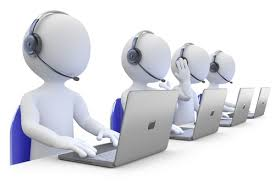

In [76]:
from IPython.display import Image
Image("Callpic.jpg")

### Contact Centre
Contact centers and call centers are both centers for customer service, and the two terms are often used interchangeably, but a contact center supports more services than a typical call center.

##### A Key Performance Indicator (KPI) is a measurable value that demonstrates how effectively a company is achieving key business objectives. Organizations use KPIs to evaluate their success at reaching targets.

Contact centers offer omnichannel customer support, including email, chat, voice over IP (VoIP) and website support. A call center typically uses phones as the main channel of communication and can handle a mass volume of calls.
Contact center capabilities and infrastructure
Contact centers are used for inbound communication, outbound communication or a hybrid of both. Contact center agents also interact with customers via webchat, phone, email or other communication channels.

####  analytics play an increasingly important role in predicting customer behavior. 

The main difference between a call center and a contact center is that while a call center is focused on incoming and outgoing voice calls, a contact center is able to manage customers with both voice calls and data applications like e-mail, Web-based chat/instant messaging, and in some cases will include the capability to share Web pages sent to and from the customer. The fully functional contact center takes advantage of customer needs for text and visual communications in addition to phone calls; typically a contact center also uses a “blended agent” who can manage multiple forms of voice and data-centric customer communications.
The IP contact center takes advantage of the inherent benefits of IP communications including the fact that both voice and data communications can be efficiently routed to any agent who has access to a (broadband) IP connection — hence the elimination of the need for a centralized call center as a widely distributed agent pool across multiple locations can be achieved.

### KPIs

#### Average Time in Queue 
No one wants to wait in a queue for a long period of time. Thus, in order to ensure your callers’ wait time is within an acceptable range – and customer satisfaction is as well – you must keep track of average time in queue. This KPI is the total time callers wait in call queues divided by the total number of calls answered by agents. It is a great indicator of whether or not your team is providing their callers with the service they deserve.
#### Average Abandonment Rate
Call abandonment, or the percentage of callers who hang up before reaching an agent, is a common occurrence in the call center and has a detrimental impact on customer retention. It is therefore imperative that customer-centric call centers keep track of this KPI and make sure that it remains below a target threshold.
#### Service Level
Service level is the percentage of calls answered within a specified number of seconds. This call center KPI is typically displayed in real-time to both agents and managers in their call center software metrics dashboard so they can make data-driven decisions that will have an impact on keeping this KPI within an acceptable range.
#### Average Speed of Answer
The average speed of answer is the average time it takes for calls to be answered in the call center during a specific time frame. This includes time spent waiting in a queue and while the agent’s phone rings however does not include the time it takes to navigate through the IVR. It is a call center KPI typically referenced by managers when assessing their team’s efficiency and degree of accessibility to their callers.
#### Average Handle Time
Average handle time is the elapsed time from when an agent answers a call until the agent disconnects. It is one of the most commonly analyzed KPIs in the call center industry as it is directly related to caller satisfaction.
#### Average After Call Work Time
In most call centers, an agent’s work does not end when they finish a call. In fact, they often spend quite a bit of time updating databases, sending emails and informing teammates about the call. This time an agent spends completing a transaction after the caller has disengaged is called after call work time. Managers often seek to reduce after call work so that they can maximize the time their team spends interacting with customers while they are on the clock.
#### First Call Resolution
First call resolution is another KPI that is directly related to customer satisfaction – and it is easy to see why. It is the percentage of calls that the agent completely addresses the caller’s needs without having to transfer, escalate or return the call. Resolving an issue on first contact is so important, that many claim that first call resolution is the single most important KPI related to a customer’s level of satisfaction with a company. It therefore should be at the top of any list of call center KPIs to track over time.
#### Customer Satisfaction
Customer satisfaction is a KPI that can be acquired from many different sources. Call centers typically arrive at a customer satisfaction score by conducting customer surveys as well as obtaining quality assurance measurements. Regardless of the methodology used to arrive at this KPI, it is one that should always be considered when analyzing call center effectiveness and efficiency.
#### Occupancy Rate
Occupancy rate measures the amount of time agents are on live calls as well as completing work associated with the calls. While most call center managers seek to optimize occupancy rates, they must also be cognizant of agent workload as well as agent stress when setting targets for this call center KPI.

## Date simulation !!!!!!!!!!!!!

In [183]:
rng = pd.date_range('1/1/2006', periods = 150, freq = 'M')
rng

DatetimeIndex(['2006-01-31', '2006-02-28', '2006-03-31', '2006-04-30',
               '2006-05-31', '2006-06-30', '2006-07-31', '2006-08-31',
               '2006-09-30', '2006-10-31',
               ...
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31',
               '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30'],
              dtype='datetime64[ns]', length=150, freq='M')

## Generate random Call Centre data with np.random.randn using dates from rng as index

In [184]:
Calls = pd.DataFrame(np.random.poisson(3617, len(rng)), index=rng, columns = ["Calls"])
Calls["Avg_Wait"] = pd.DataFrame.assign(np.random.poisson(27, len(rng)))
Calls["Aband"] = pd.DataFrame.assign(np.random.poisson(50, len(rng)))
Calls["ServLev"] = pd.DataFrame.assign(np.random.poisson(65, len(rng)))
Calls["SpdAns"] = pd.DataFrame.assign(np.random.poisson(65, len(rng)))
Calls["AvgHand"] = pd.DataFrame.assign(np.random.poisson(15, len(rng)))
Calls["eMails"] = pd.DataFrame.assign(np.random.poisson(500, len(rng)))
Calls["Avail"] = pd.DataFrame.assign(np.random.poisson(347, len(rng)))
Calls["NumAgent"] = pd.DataFrame.assign(np.random.poisson(241, len(rng)))
Calls["Ocup %"] = pd.DataFrame.assign((Calls.NumAgent / Calls.Avail)*100)
Calls["Ocup %"] = Calls["Ocup %"].apply(np.round)
Calls["CR%"] =  pd.DataFrame.assign(np.random.poisson(50, len(rng)))
Calls["Sfact"] =  pd.DataFrame.assign(np.random.poisson(70, len(rng)))
Calls.head()

,Calls,Avg_Wait,Aband,ServLev,SpdAns,AvgHand,eMails,Avail,NumAgent,Ocup %,CR%,Sfact
2006-01-31,3545,25,60,64,75,9,513,336,240,71.0,50,69
2006-02-28,3623,30,47,68,59,19,514,326,239,73.0,43,47
2006-03-31,3650,26,50,76,61,18,496,327,249,76.0,60,46
2006-04-30,3528,35,54,64,64,23,491,346,231,67.0,50,79
2006-05-31,3607,22,60,52,72,8,498,351,231,66.0,58,73


In [185]:
Calls.mean()

Calls       3607.766667
Avg_Wait      27.120000
Aband         50.826667
ServLev       63.666667
SpdAns        63.793333
AvgHand       14.733333
eMails       498.853333
Avail        348.326667
NumAgent     240.593333
Ocup %        69.246667
CR%           49.440000
Sfact         69.713333
dtype: float64

In [186]:
Calls.describe()

,Calls,Avg_Wait,Aband,ServLev,SpdAns,AvgHand,eMails,Avail,NumAgent,Ocup %,CR%,Sfact
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,3607.766667,27.120000,50.826667,63.666667,63.793333,14.733333,498.853333,348.326667,240.593333,69.246667,49.440000,69.713333
std,59.269651,5.016643,6.875447,8.230461,8.540701,3.572202,21.775976,19.920141,14.608583,5.844675,6.911211,9.241965
min,3464.000000,16.000000,28.000000,42.000000,41.000000,7.000000,448.000000,300.000000,199.000000,56.000000,34.000000,46.000000
25%,3565.000000,24.000000,47.000000,57.000000,59.000000,12.000000,484.250000,335.250000,230.000000,65.250000,45.000000,64.000000
50%,3604.500000,27.000000,51.000000,64.000000,63.000000,15.000000,499.500000,347.500000,240.000000,69.000000,50.000000,70.000000
75%,3648.750000,30.000000,55.000000,70.000000,69.000000,17.000000,513.750000,362.750000,248.750000,73.000000,54.000000,76.000000
max,3763.000000,42.000000,71.000000,83.000000,92.000000,23.000000,554.000000,411.000000,283.000000,86.000000,70.000000,95.000000


In [187]:
Calls.loc['2017-11-30':'2018-05-31']

,Calls,Avg_Wait,Aband,ServLev,SpdAns,AvgHand,eMails,Avail,NumAgent,Ocup %,CR%,Sfact
2017-11-30,3519,27,56,68,64,20,470,351,251,72.0,39,61
2017-12-31,3565,22,41,75,59,13,505,311,224,72.0,50,75
2018-01-31,3561,27,47,80,57,17,531,337,222,66.0,55,73
2018-02-28,3608,30,55,71,53,15,481,354,245,69.0,42,66
2018-03-31,3587,25,48,42,62,17,485,341,258,76.0,60,66
2018-04-30,3518,25,49,56,54,19,507,379,249,66.0,43,60
2018-05-31,3536,25,64,55,66,18,489,375,247,66.0,49,75


In [188]:
Calls.loc['2017-11-30':'2018-05-31'].mean()

Calls       3556.285714
Avg_Wait      25.857143
Aband         51.428571
ServLev       63.857143
SpdAns        59.285714
AvgHand       17.000000
eMails       495.428571
Avail        349.714286
NumAgent     242.285714
Ocup %        69.571429
CR%           48.285714
Sfact         68.000000
dtype: float64

In [189]:
Calls.resample('Y').mean()

,Calls,Avg_Wait,Aband,ServLev,SpdAns,AvgHand,eMails,Avail,NumAgent,Ocup %,CR%,Sfact
2006-12-31,3608.333333,27.250000,51.333333,62.583333,65.583333,14.333333,489.083333,343.833333,235.416667,68.583333,49.250000,68.666667
2007-12-31,3602.583333,27.083333,51.833333,62.000000,63.916667,16.500000,503.166667,354.333333,239.250000,67.500000,50.833333,67.916667
2008-12-31,3615.583333,30.500000,50.666667,68.833333,65.000000,13.833333,502.666667,347.166667,236.166667,68.166667,49.750000,73.750000
2009-12-31,3626.250000,27.833333,53.416667,66.000000,62.416667,14.083333,498.500000,350.833333,232.083333,66.250000,52.333333,71.583333
2010-12-31,3603.500000,25.833333,52.083333,61.083333,59.833333,14.416667,504.833333,350.083333,238.416667,68.166667,50.583333,69.916667
2011-12-31,3582.583333,25.916667,45.750000,62.666667,63.250000,15.166667,497.833333,349.083333,244.583333,70.333333,47.583333,69.166667
2012-12-31,3603.000000,26.833333,53.166667,61.083333,70.833333,15.500000,493.333333,350.500000,246.250000,70.333333,48.500000,73.500000
2013-12-31,3621.166667,26.916667,47.333333,60.666667,63.500000,16.083333,486.583333,352.916667,253.083333,72.250000,48.583333,68.083333
2014-12-31,3619.000000,26.666667,48.333333,67.416667,63.666667,14.583333,510.583333,345.416667,240.666667,70.166667,50.333333,69.333333
2015-12-31,3623.000000,27.666667,51.250000,64.500000,64.500000,15.000000,496.916667,352.750000,240.416667,68.250000,48.916667,64.583333


### SLA Calculation - speed of answer

In [190]:
Calls.head()

,Calls,Avg_Wait,Aband,ServLev,SpdAns,AvgHand,eMails,Avail,NumAgent,Ocup %,CR%,Sfact
2006-01-31,3545,25,60,64,75,9,513,336,240,71.0,50,69
2006-02-28,3623,30,47,68,59,19,514,326,239,73.0,43,47
2006-03-31,3650,26,50,76,61,18,496,327,249,76.0,60,46
2006-04-30,3528,35,54,64,64,23,491,346,231,67.0,50,79
2006-05-31,3607,22,60,52,72,8,498,351,231,66.0,58,73


In [191]:
Temp = Calls.loc[Calls['Avg_Wait'] <= 22]
Temp.head()

,Calls,Avg_Wait,Aband,ServLev,SpdAns,AvgHand,eMails,Avail,NumAgent,Ocup %,CR%,Sfact
2006-05-31,3607,22,60,52,72,8,498,351,231,66.0,58,73
2006-10-31,3622,22,48,56,52,14,470,345,248,72.0,52,65
2006-12-31,3631,16,46,83,66,10,494,358,265,74.0,55,67
2008-07-31,3549,21,40,66,92,12,515,368,209,57.0,38,85
2009-06-30,3581,22,54,62,62,11,465,323,238,74.0,58,79


### Greater or equal to !!!  Really GOOD!!!!!!!

In [192]:
Calls.loc[Calls.Aband <= 50, 'Aband50?'] = 'True' 
Calls.loc[Calls.Aband > 50, 'Aband50?'] = 'False' 
Calls.head()

,Calls,Avg_Wait,Aband,ServLev,SpdAns,AvgHand,eMails,Avail,NumAgent,Ocup %,CR%,Sfact,Aband50?
2006-01-31,3545,25,60,64,75,9,513,336,240,71.0,50,69,False
2006-02-28,3623,30,47,68,59,19,514,326,239,73.0,43,47,True
2006-03-31,3650,26,50,76,61,18,496,327,249,76.0,60,46,True
2006-04-30,3528,35,54,64,64,23,491,346,231,67.0,50,79,False
2006-05-31,3607,22,60,52,72,8,498,351,231,66.0,58,73,False


### Call Abandonment
The Call Abandonment metric measures the number of callers that hang up or that are disconnected before they can be connected to one of your agents. This metric is closely tied to your Service Level KPI and Customer Satisfaction metrics. No one likes being stuck on hold, and your customers only have so much patience before they will hang up, or, worse, switch their brand loyalties.
The interesting part of the call abandonment metric is that it can be utilized in both a strategic and tactical capacity. From a strategic perspective, you should monitor this metric over the long term to identify patterns in your call center that you can fix through staffing or technical solutions. On the other hand, a tactical or real-time view of this metric is important in identifying problems as they occur to stop a few dropped calls from escalating into a larger issue.
Key Terms
Active calls: The number of callers currently being handled by a live agent.
On hold calls: The number of callers that have talked with a forwarding agent or automated system, and are waiting in the queue to talk to a live agent.
Abandoned: The number callers who hang up before they can be connected with a live agent. Callers may either abandon prior to connecting with a forwarding agent or automated system, or abandon the call while waiting in the queue.
Success indicators
Consistently meeting SLAs means a low call abandonment rate.
A low abandonment rate while maintaining a high first call resolution rate.

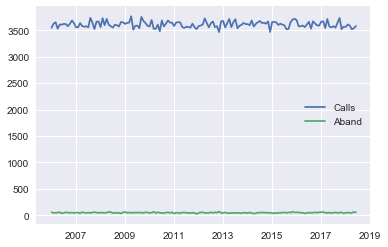

In [200]:
Calls.plot(y=['Calls','Aband'], use_index=True)

### True/False Hue really good for SLA.......

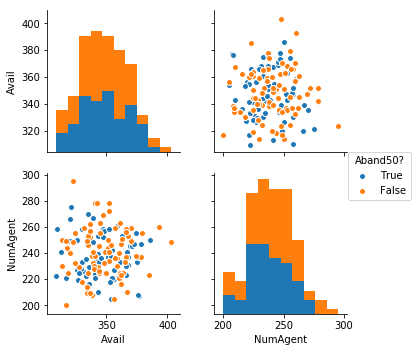

In [87]:
import seaborn as sns
sns.pairplot(Calls, hue='Aband50?', vars=['Avail', 'NumAgent'])

In [101]:
Calls.loc[Calls.Sfact <= 75, 'Cust Satisfied?'] = 'True' 
Calls.loc[Calls.Sfact > 75, 'Cust Satisfied?'] = 'False' 
Calls.head()

,Calls,Avg_Wait,Aband,ServLev,SpdAns,AvgHand,eMails,Avail,NumAgent,Ocup %,CR%,Sfact,Aband50?,Cust Satisfied?
2006-01-31,3606,22,46,75,64,11,474,369,251,68.0,45,78,True,False
2006-02-28,3510,19,45,68,56,15,489,367,241,66.0,52,73,True,True
2006-03-31,3511,31,58,62,69,8,506,324,255,79.0,49,65,False,True
2006-04-30,3626,26,52,58,84,12,488,361,225,62.0,57,67,False,True
2006-05-31,3532,16,44,74,61,16,522,342,235,69.0,46,71,True,True


In [98]:
Calls1 = Calls.loc[:, 'eMails':'Cust Satisfied?']
Calls1.head()

,eMails,Avail,NumAgent,Ocup %,CR%,Sfact,Aband50?,Cust Satisfied?
2006-01-31,474,369,251,68.0,45,78,True,False
2006-02-28,489,367,241,66.0,52,73,True,True
2006-03-31,506,324,255,79.0,49,65,False,True
2006-04-30,488,361,225,62.0,57,67,False,True
2006-05-31,522,342,235,69.0,46,71,True,True


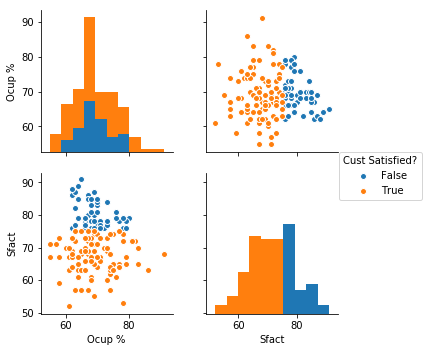

In [99]:
sns.pairplot(Calls, hue='Cust Satisfied?', vars=['Ocup %', 'Sfact'])

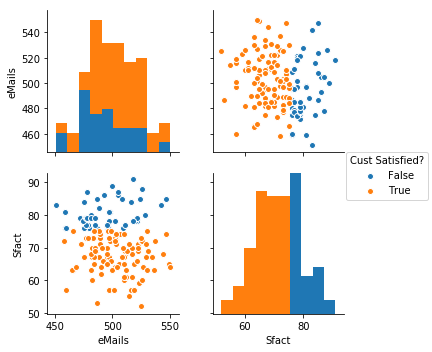

In [100]:
import seaborn as sns
sns.pairplot(Calls, hue='Cust Satisfied?', vars=['eMails', 'Sfact'])

In [201]:
df= Calls.loc[:, ['Calls', 'Aband']]
df.head()

,Calls,Aband
2006-01-31,3545,60
2006-02-28,3623,47
2006-03-31,3650,50
2006-04-30,3528,54
2006-05-31,3607,60


### Poisson distribution
The Poisson distribution, named after French mathematician S. D. Poisson, is a discrete probability distribution that expresses the likelihood of a given number of events occurring in a fixed interval of time (and/or space) if these events occur with a known average rate and independently of the time since the last event occurred.

___

### Abandon Rate
Abandon rate is the number of calls that hang-up before connecting to an agent. This number does not include those calls that receive a busy signal.
Calculation: Abandoned Calls / Total Incoming calls
When analyzing your abandon rate, be aware that there are a small percentage of people who call the wrong number and hang-up once they hear your company name on the automated message (i.e.: "Thank you for calling ABC Corporation."). Typically these false abandon rates are calculated within the first 10 seconds and in most centres this can be between 1-2% of all total calls. This number may increase if a toll-free number is similar to another that receives high call volume.
Typically, abandon rates are linked to how fast call centre agents answer calls. The faster a call is answered, the lower the abandon rate. High abandon rates can result in lost sales opportunities and poor customer service. High abandon rates have the potential to artificially inflate future call volume as the initial customers who could not get through on the first call continue to call back until they reach an agent.
Example:
You receive 100 calls in one hour. Of those calls, 10 people hang up before speaking to an agent, so your abandon rate for the last hour has been 10%.
### Average Talk Time (ATT) & After Call Work (ACW) & Average Handle Time(AHT)
Average-Talk-Time (ATT) is the average amount of time agents talk to customers. After-Call-Work (ACW) is the average amount of time an agent takes to wrap-up a call. Average Handle Time is the combination of both ATT and ACW.
Calculation: Average-Talk-Time + After-Call-Work
Contact centres tend to place tremendous effort in driving down AHT because it is directly related to increased cost. In very large centres, an additional second of AHT can add as much as one million dollars in additional annualized costs. It is important however not just to monitor AHT but also the effectiveness of a call. The key is to find the right balance for your business.
Example:
Agent 'A' spends 190 seconds in ATT and completes all the necessary administrative duties (such as completing an order or opening a service ticket) while the customer is on the phone and spends only 20 seconds in ACW.

Agent 'B' spends 140 seconds speaking to the customer, hangs up and spends 70 seconds in ACW completing necessary administrative duties.

Both agents have an equal AHT of 210 seconds, from a cost perspective they have performed equally. The question now is which customer ended the call feeling most satisfied.

### Service Level & Average Speed of Answer (ASA)
Service level is usually defined as the percentage of calls answered within a predetermined number of seconds. If your service level target is 80/20, then you are striving to answer 80% of all calls within 20 seconds (or about 5-6 "rings"). The faster an agent answers a customer call, the higher service levels tend to be. Once your "seconds" target is established, you can report your service level as a percentage. There is no defined standard but many contact centres strive for 80/20 or 80/30 as their standard for tracking this metric. Answering calls too quickly can result in significant additional costs to the business (because of the significant labour costs required to meet very high service levels). Some centres are able to operate at 70/40 based on business needs and client expectations. It is important that this metric remain fluid, based on customer type, call type, campaign, and competitive landscape.
Average Speed of Answer (commonly referred to as ASA) is the average number of seconds it takes for a call to be answered. If calls are, on average, answered in 15 seconds, the ASA is 15 seconds for the contact centre.
Generally, the shorter the ASA, the better your Service Level and vice versa.
### First Call Resolution
First Call Resolution (FCR) is a relatively new metric to the contact centre industry. FCR measures the percentage of customer issued calls that are resolved the first time.
Calculation: Number of FCR calls / Total Number of Calls
The difficulty is defining what a successful FCR is when millions of calls are arriving in your contact centre. It is a challenge to effectively track whether a customer has received a resolution they are satisfied with.
Contact centres will use a time frame within the first customer call to determine if that call was successfully resolved in the first call. For example some centres will use a 72 hour time frame to help determine a negative or positive FCR. If a customer calls back within a 72-hour period then this is considered an unsuccessful FCR. There are inherent flaws in this calculation – for instance when a customer calls back after 72 hours with the same issue or within 72 hours with a new or different issue. Some contact centres use customer satisfaction surveys to gain further insight into FCR.
Although there are flaws with this type of tracking, monitoring the average of FCR will give you some sense as to how well your agents are able to resolve a customer’s issue on the first call.
In a time when the customer experience is paramount, FCR is a key metric to measure and understand. Some contact centres will say this is the most important metric to analyze, especially when you consider that a Customer may wait a while to reach an agent and receive extreme satisfaction with the call. This metric is also important to consider when it is compared to a Customer who reaches an agent immediately but the agent is unable to help the Customer.
A very high FCR can save your organization considerable money (the result is less repeat calls) and greatly improves customer satisfaction.
Example:
If 8 of 10 calls are resolved on the first call then that centre has reached an FCR of 80%.
7. Occupancy
Occupancy defines how well staff is scheduled for the call volumes coming into your contact centre. An inblockquoteidual’s occupancy rate can also be determined by using the same formula.
Calculation: Total Call Time / (Total Call Time + Available Time)
There is no call centre standard for occupancy but if you have low occupancy (i.e. <70%) you risk boredom by your agents. If you have consistently high occupancy (i.e. >85%) you risk over-extending your agents which can lead to higher and faster turnover. Many contact centres try to keep their occupancy metric between 70% and 80% to maintain a healthy balance.
Example:
If your contact centre has 100 hours of time your agents can take calls, and they are speaking to Customers for 80 hours of that 100 hours, your occupancy is 80/100 or 80%.
8. Cost per Call (Contact)
Cost per call is calculated as the cost of a call arriving and being answered at your contact centre. There are many ways to calculate this, and here we will focus on the basic cost per call and the fully loaded cost per call.
Basic Cost per Call:
Calculation: Calls per Hour / Agent’s Hourly Wage
Basic cost per call is useful when determining the extra cost associated with handling a nominal number of additional calls. Once you reach a certain level of increased calls you may need to add additional agents, supervisors and stations.
Example:
If your agent takes 15 calls per hour and is paid an hourly wage of $15 then the cost per call is $1. In order to handle an additional 100 calls within your contact centre you will have to pay $100 more.
Fully Loaded Cost per Call:
Calculation: (Annual Operating Cost + Labour) / Total Number of Calls per Year
Annual operating costs take into account facilities, supervisors, managers, benefits, incentives, maintenance, desktops, etc. Fully loaded cost per call is useful if you want to compare your efficiencies with that of a third party contact centre operation. Most contact centres’ budgeted cost per call metrics are based on a fully loaded cost.
Example:
If your annual operating costs are $100,000 per year and your labours costs are $1,000,000 and you receive 4,000,000 calls per year the fully loaded cost per call is $.28
9. Turnover (Attrition)
Turnover (also known as attrition) is a commonly tracked metric in the contact centre industry.
There are two types turnover:
1. Voluntary - Staff choosing to leave
2. Involuntary - Staff being asked to leave
Turnover measures the number of people who leave your contact centre (as a percentage).
Calculation: Number of People to Leave / Number of Positions
Turnover can be a positive or a negative. Some turnover due to performance management (terminating a poor performer) is a positive for the contact centre. If good performers leave, you have turnover that would be considered negative in your contact centre. You should also consider whether people are leaving your contact centre for other positions within the company which would be considered good turnover from an organization’s perspective.
Turnover varies depending on what your contact centre is accomplishing. High turnover in 3rd party outbound contact centres is common, since staffing is constantly adjusted for programs that are starting and finishing. In an in-house contact centre where call volumes are predictable and steady, your turnover should be lower.
High turnover can be expensive for two reasons.
Staff will be relatively untrained which can lead to problems in dealing with issues consistently. It costs to train agents and during training they are not contributing to productivity.
Increased recruitment and training costs, poor Customer experience, potential lost sales opportunities, low morale if you are understaffed for your call volume and agents may see the call centre as a “revolving door”.
Low turnover can be both a benefit and a liability. The benefit is that you have seasoned agents who understand the business and the customers. The liability can be in the cost of staffing as vacation time grows for more tenured agents. A 20 year veteran team of agents may receive a relatively high hourly pay rate and 6 or more weeks of vacation time. This can pose a challenge to costs and staffing.
Some call centres are analyzing voluntary turnover to understand why key staff are leaving the business or if the departing staff are employees you wanted to leave. If you are losing your key people this could be a sign of a bigger problem within the organization, such as poor morale.
High involuntary turnover may be a sign of poor hiring practices. In this case new hires may not be appropriately matched for the roles and the culture of the organization.
Example:
If there 100 full-time staff positions and 12 people leave in a year, your average turnover is 12% for that year (1 person leaves, on average, each month).
10. Call Quality
Call Quality is a standard scoring/rating system that contact centres use to determine how well an agent deals with the customers. There are no industry standards for monitoring quality, but there will usually be a list of criteria that an agent must cover during a call. This includes, but is not limited to, how the agent answers the call, how they navigate the caller to a resolution, and how they end the call.
Calculation: Number of Criteria Met / Number of Total Criteria
Management can have ten or more criteria for what they consider to be a good call. Some of the criteria are weighted based on importance (eg, effectively probing to understand client’s needs). Usually the criteria are added up to an ultimate quality score that is displayed as a percentage. The benefit to breaking down the call into inblockquoteidual criteria is to have specific areas of development to coach agents and improve call quality.
Many contact centres are adding FCR to their scoring criteria to focus on the customer experience. Some contact centers look at both call quality scores as well as scores achieved from the customer satisfaction survey. An agent may score 70% in call quality and a 90% on the customer satisfaction survey. In this regard, contact centres must consistently balance quality scores and customer experience.
Quality assessments are not limited to calls. Contact centres should score e-mail and chat functions for quality as well as any other customer interactions.
Example:
If a contact centre has 20 criteria for a perfect call and the agent executes against 18 of the criteria well then the agent’s score is 90%. The overall quality score for the contact centre is the weighted average of all agents’ quality scores. The number of calls monitored to determine a quality score varies from centre to centre, although between 5 to 15 calls monitored and scored per agent per month is common.